In [35]:
import pandas as pd
from pathlib import Path


In [36]:
# Lê arquivo excel
df = pd.read_excel(r"Chamados ficticios - Cora (Dez_2020).xlsx")

# remover colunas desnecessárias
df = df.drop(columns=["SequentialId", "Team", "Closed"])

# Dropa valores inválidos
df = df.dropna()


display(df)
df.isna().sum()

,Fechamento do Chamado,Tags,QueueTime,FirstResponseTime,AverageResponseTime,CustomerCity,AgentName,App Version
0,2020-07-28 18:04:28 -03:00,Cartão Bloqueado,0d 00:00:40,0d 00:00:08,18.26 s,Manaus/AM,Leonardo Law,0.0.1.30
1,2020-07-28 17:13:06 -03:00,Solicitando Crédito,0d 00:02:01,0d 00:00:02,66.08 s,Teresina/PI,Leonardo Law,0.0.1.30
2,2020-07-28 12:22:41 -03:00,Reclamação Atendimento,0d 00:00:43,0d 00:00:03,10.43 s,Manaus/AM,Polly da Cora,0.0.1.29
3,2020-07-28 12:10:55 -03:00,Reclamação Atendimento,0d 00:00:50,0d 00:00:05,55.41 s,Santo André/SP,Polly da Cora,0.0.1.28
4,2020-07-28 10:40:58 -03:00,Erro Transferencia,0d 00:11:09,0d 00:00:08,483.59 s,Pedro Leopoldo/MG,Polly da Cora,0.0.1.29
...,...,...,...,...,...,...,...,...
99,2020-07-02 10:46:49 -03:00,Reclamação Atendimento,0d 00:03:47,0d 00:00:18,491.27 s,Fortaleza/CE,Cora Pagamentos,0.0.1.26
101,2020-07-01 18:12:20 -03:00,Adicionar sócio,0d 00:01:19,0d 00:07:40,45.14 s,Rio de Janeiro/RJ,Mel,0.0.1.26
105,2020-07-01 12:12:50 -03:00,Cartão Bloqueado,0d 00:01:30,0d 00:00:07,33.94 s,Itaeté/BA,Cora Pagamentos,0.0.1.26
106,2020-07-01 11:48:30 -03:00,Reclamação Atendimento,0d 00:02:20,0d 00:00:05,718.89 s,São João de Meriti/RJ,Polly da Cora,0.0.1.26


Fechamento do Chamado    0
Tags                     0
QueueTime                0
FirstResponseTime        0
AverageResponseTime      0
CustomerCity             0
AgentName                0
App Version              0
dtype: int64

In [37]:
# TRATAMENTO DE DADOS

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 107
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Fechamento do Chamado  98 non-null     object
 1   Tags                   98 non-null     object
 2   QueueTime              98 non-null     object
 3   FirstResponseTime      98 non-null     object
 4   AverageResponseTime    98 non-null     object
 5   CustomerCity           98 non-null     object
 6   AgentName              98 non-null     object
 7   App Version            98 non-null     object
dtypes: object(8)
memory usage: 6.9+ KB


In [38]:
# Remove o " s" representando a unidade de segundos
df["AverageResponseTime"] = df["AverageResponseTime"].apply(lambda x: x[0:-2]).astype(float)
df["AverageResponseTime"] /= 60

In [39]:
# Calcular o tempo médio de resposta por agente
df_tempo_por_agente = df.groupby("AgentName")[["AverageResponseTime"]].mean()
df_tempo_por_agente = df_tempo_por_agente.sort_values("AverageResponseTime")

<Axes: ylabel='AgentName'>

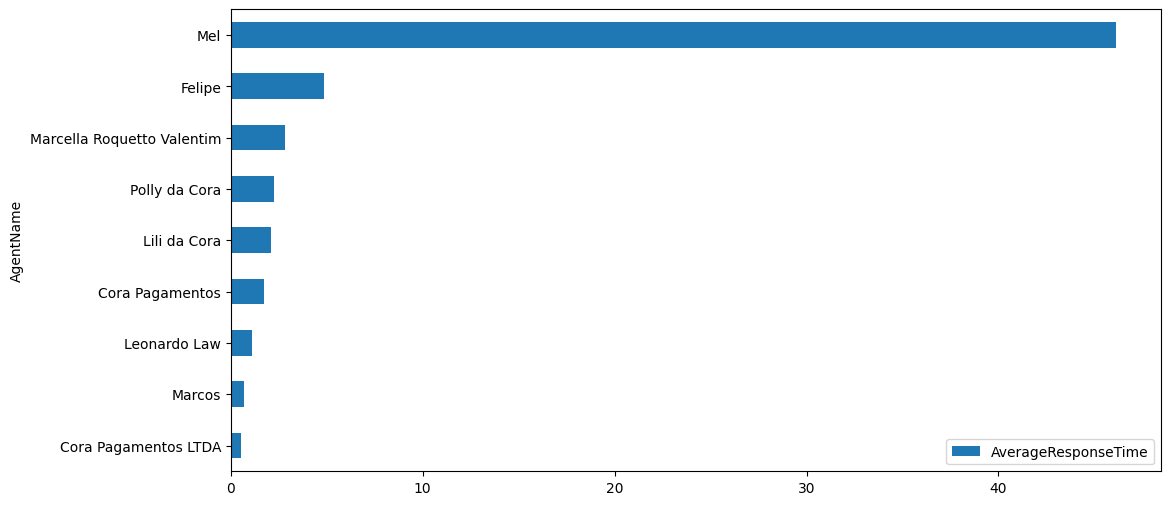

In [40]:
# Visualizando dados
df_tempo_por_agente.plot(kind="barh",figsize=(12, 6))

In [41]:
# Definindo o caminho do arquivo.
# Isso torna o código mais legível e fácil de manter.

output_file = Path("analise_de_dados_excel/eficiencia_agentes.xlsx")
# Criando um diretório pai, se ele não existir
output_file.parent.mkdir(parents=True, exist_ok=True)

# Criando planilha a set exportada
with pd.ExcelWriter(output_file, engine="xlsxwriter") as excel:


    # Exportação básica inicial
    df_tempo_por_agente.to_excel(excel, sheet_name = "Tempos de Resposta")


    # Acessando o workbook (planilha) e a worksheet (aba)
    wb = excel.book
    ws = excel.sheets["Tempos de Resposta"]

    # Configurando formatação condicional de dados
    range_colunas = "B2:B10"
    ws.conditional_format(range_colunas, {"type": "3_color_scale", "min_color": "green", "max_color": "red"})